# Generating missing values in tabular data

This tutorial shows how to generate missing values on pre-existing tabular data and to visualize both the original and the transformed data




In [1]:
from sklearn.datasets import make_blobs
from badgers.generators.tabular_data.missingness import MissingCompletelyAtRandom, DummyMissingNotAtRandom, DummyMissingAtRandom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_missing(X, y, Xt):
    """
    Some utility function to generate the plots
    """
    missing_mask = np.isnan(Xt).any(axis=1)
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
    for label in np.unique(y):
        ix = np.where(y == label)
        axes[0].scatter(X[ix,0],X[ix,1], c = f'C{label}', label = f'{label}')
        ix = np.where(y[~missing_mask] == label )
        axes[1].scatter(Xt[~missing_mask][ix,0], Xt[~missing_mask][ix,1], c = f'C{label}', label = f'{label}')
    # plot missing values
    axes[1].scatter(X[missing_mask][:,0],X[missing_mask][:,1],marker='x', color='black', label = 'missing')
    axes[0].set_title('Original')
    axes[1].set_title('Transformed')
    axes[0].set_xlabel('dimension 0', fontsize=10)
    axes[1].set_xlabel('dimension 0', fontsize=10)
    axes[0].set_ylabel('dimension 1', fontsize=10)
    axes[1].set_ylabel('dimension 1', fontsize=10)
    axes[0].legend()
    axes[1].legend()
    return fig, axes


## Setup random generator

In [3]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [4]:
# load data
X, y = make_blobs(centers=4, random_state=0)
X = pd.DataFrame(data=X, columns=['dimension_0', 'dimension_1'])
y = pd.Series(y)

## Generate missing values

Missing value mechanisms are usually categorized as *missing completely at random* (MCAR), 
*missing at random* (MAR), and *missing not at random* (MNAR).

### Missing completely at random (MCAR)

The transformer simply replaces values (row, col) with `np.nan` independently at random.

In [5]:
trf = MissingCompletelyAtRandom(random_generator=rng)
Xt, _ = trf.generate(X.copy(), y, percentage_missing=0.25)

In [6]:
Xt.head()

,dimension_0,dimension_1
0,NaN,3.123155
1,NaN,8.102511
2,1.737308,4.425462
3,NaN,4.681950
4,2.206561,5.506167


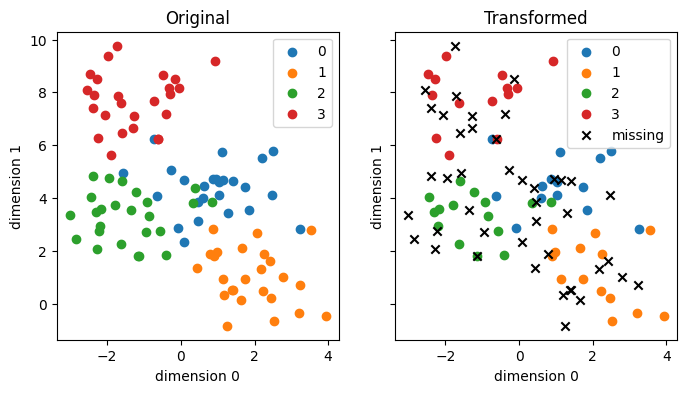

In [7]:
fig, axes = plot_missing(X.values, y.values, Xt.values)

### Missing at random (MAR)

Missing not at random means that the fact that a value is missing correlates with some other features.

The DummyMissingAtRandom transformer replaces a value (row,col) with `np.nan` depending upon another feature chosen randomly. The probability of missingness depends linearly on the other chosen feature.

In [8]:
trf = DummyMissingAtRandom(random_generator=rng)
Xt, _ = trf.generate(X.copy(), y, percentage_missing=0.25)

In [9]:
Xt.head()

,dimension_0,dimension_1
0,0.465465,3.123155
1,-2.541113,NaN
2,1.737308,4.425462
3,1.131218,4.681950
4,2.206561,5.506167


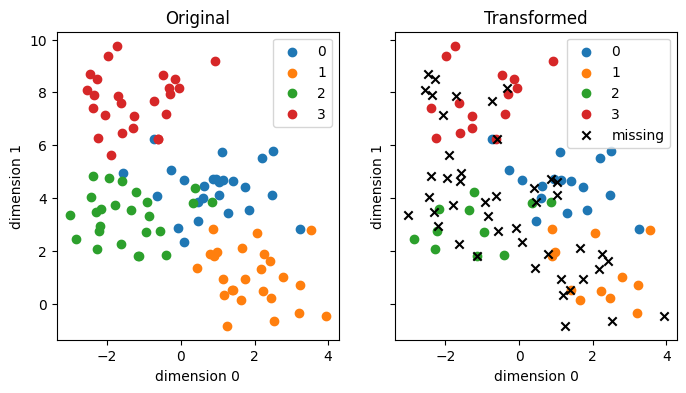

In [10]:
fig, axes = plot_missing(X.values, y.values, Xt.values)

### Missing not at random (MNAR)

Missing not at random means that the value that is missing depends on its own value had it not been missing.

The DummyMissingNotAtRandom simply replaces a value with `np.nan` with a probability proportional to the original value.

In [11]:
trf = DummyMissingNotAtRandom(random_generator=rng)
Xt, _ = trf.generate(X.copy(), y, percentage_missing=0.25)

In [12]:
Xt.head()

,dimension_0,dimension_1
0,0.465465,NaN
1,NaN,8.102511
2,NaN,4.425462
3,1.131218,4.681950
4,NaN,5.506167


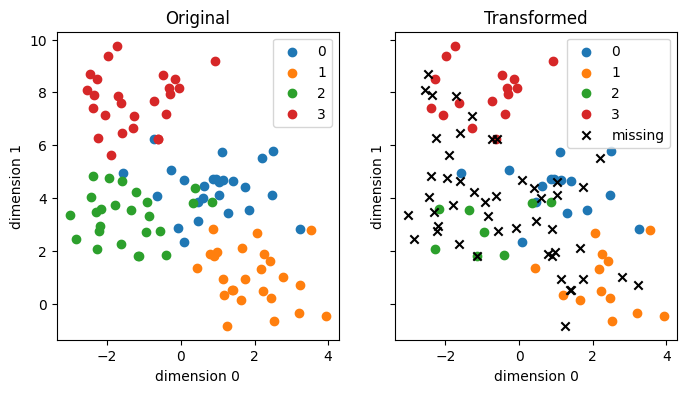

In [13]:
fig, axes = plot_missing(X.values, y.values, Xt.values)